In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import os

In [ ]:
model_saving_dir='./model_saving/'
if not os.path.exists(model_saving_dir):
    os.makedirs(model_saving_dir)

In [2]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images=train_images.reshape(-1,784)
train_labels=pd.get_dummies(train_labels)
test_images=test_images.reshape(-1,784)
test_labels=pd.get_dummies(test_labels)

In [3]:
x=tf.placeholder(tf.float32,[None,784],name='X')
y=tf.placeholder(tf.float32,[None,10],name='Y')

hidden_layer_1_neurons=256
hidden_layer_2_neurons=64

w1=tf.Variable(tf.truncated_normal([784,hidden_layer_1_neurons],stddev=0.1))
b1=tf.Variable(tf.zeros([hidden_layer_1_neurons]))
w2=tf.Variable(tf.truncated_normal([hidden_layer_1_neurons,hidden_layer_2_neurons],stddev=0.1))
b2=tf.Variable(tf.zeros([hidden_layer_2_neurons]))
w3=tf.Variable(tf.truncated_normal([hidden_layer_2_neurons,10],stddev=0.1))
b3=tf.Variable(tf.zeros([10]))

y1=tf.nn.relu(tf.matmul(x,w1)+b1)
y2=tf.nn.relu(tf.matmul(y1,w2)+b2)
pred=tf.nn.softmax(tf.matmul(y2,w3)+b3)


In [4]:
learning_rate=0.001
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=(tf.matmul(y2,w3)+b3),labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(loss_function)
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(pred,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [5]:
saver=tf.train.Saver()
startTime=time()
sess=tf.Session()
sess.run(tf.global_variables_initializer())

2023-03-09 19:01:29.534038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 19:01:29.542934: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


In [6]:
model_restore=tf.train.get_checkpoint_state(model_saving_dir)
if model_restore and model_restore.model_checkpoint_path:
    saver.restore(sess,model_restore.model_checkpoint_path)
    print('restore the model from: ',model_restore.model_checkpoint_path)
else:
    train_epochs=5
    batch_size=50
    train_label_row_num,train_label_column_num=train_labels.shape
    total_batch=int(train_label_row_num/batch_size)
    display_step=1
    for epoch in range(train_epochs):
        for batch in range(total_batch):
            xs=train_images[batch*batch_size:(1+batch)*batch_size]
            ys=train_labels[batch*batch_size:(1+batch)*batch_size]
            sess.run(optimizer,feed_dict={x:xs,y:ys})
        loss,acc=sess.run([loss_function,accuracy],feed_dict={x:test_images,y:test_labels})
        if(epoch+1)%display_step==0:
            print('train epochs: {:02d},'.format(epoch+1),'loss= {:.9f},'.format(loss),'accuracy= {:.4f}'.format(acc))
    saver.save(sess,os.path.join(model_saving_dir,'mnist_model.ckpt'))
    print('trained model has been saved to: ',model_saving_dir)
    print('train finished take: {:.3f}'.format(time()-startTime))

train epochs: 01, loss= 0.436410546, accuracy= 0.8959
train epochs: 02, loss= 0.324095041, accuracy= 0.9251
train epochs: 03, loss= 0.283667982, accuracy= 0.9302
train epochs: 04, loss= 0.224528268, accuracy= 0.9483
train epochs: 05, loss= 0.211826906, accuracy= 0.9528
INFO:tensorflow:./model_saving/mnist_model.ckpt.index
INFO:tensorflow:0
INFO:tensorflow:./model_saving/mnist_model.ckpt.meta
INFO:tensorflow:100
INFO:tensorflow:./model_saving/mnist_model.ckpt.data-00000-of-00001
INFO:tensorflow:2700
trained model has been saved to:  ./model_saving/
train finished take: 7.720


In [7]:
accu_test=sess.run(accuracy,feed_dict={x:test_images,y:test_labels})
print('test accuracy:',accu_test)
prediction_result=sess.run(tf.argmax(pred,1),feed_dict={x:test_images})
test_labels_ndarray=np.asarray(test_labels).reshape(-1,10)

def print_predict_err(true_label,model_prediction):
    count=0
    compare_list=prediction_result==np.argmax(test_labels_ndarray,1)
    wrong_predict_index=[i for i in range(len(compare_list)) if compare_list[i]==False]
    for i in wrong_predict_index:
        print('index=',str(i),',label value=',np.argmax(true_label[i]),',predict value=',model_prediction[i])
        count=count+1
    print('total error amount:',str(count))

print_predict_err(test_labels_ndarray,prediction_result)

test accuracy: 0.9528
index= 8 ,label value= 5 ,predict value= 4
index= 38 ,label value= 2 ,predict value= 3
index= 80 ,label value= 7 ,predict value= 9
index= 81 ,label value= 6 ,predict value= 5
index= 149 ,label value= 2 ,predict value= 4
index= 217 ,label value= 6 ,predict value= 5
index= 220 ,label value= 7 ,predict value= 9
index= 247 ,label value= 4 ,predict value= 2
index= 259 ,label value= 6 ,predict value= 0
index= 275 ,label value= 4 ,predict value= 9
index= 290 ,label value= 8 ,predict value= 4
index= 321 ,label value= 2 ,predict value= 7
index= 341 ,label value= 6 ,predict value= 4
index= 386 ,label value= 6 ,predict value= 5
index= 403 ,label value= 8 ,predict value= 5
index= 445 ,label value= 6 ,predict value= 0
index= 448 ,label value= 9 ,predict value= 5
index= 450 ,label value= 3 ,predict value= 5
index= 507 ,label value= 3 ,predict value= 5
index= 530 ,label value= 9 ,predict value= 4
index= 551 ,label value= 7 ,predict value= 1
index= 582 ,label value= 8 ,predict va

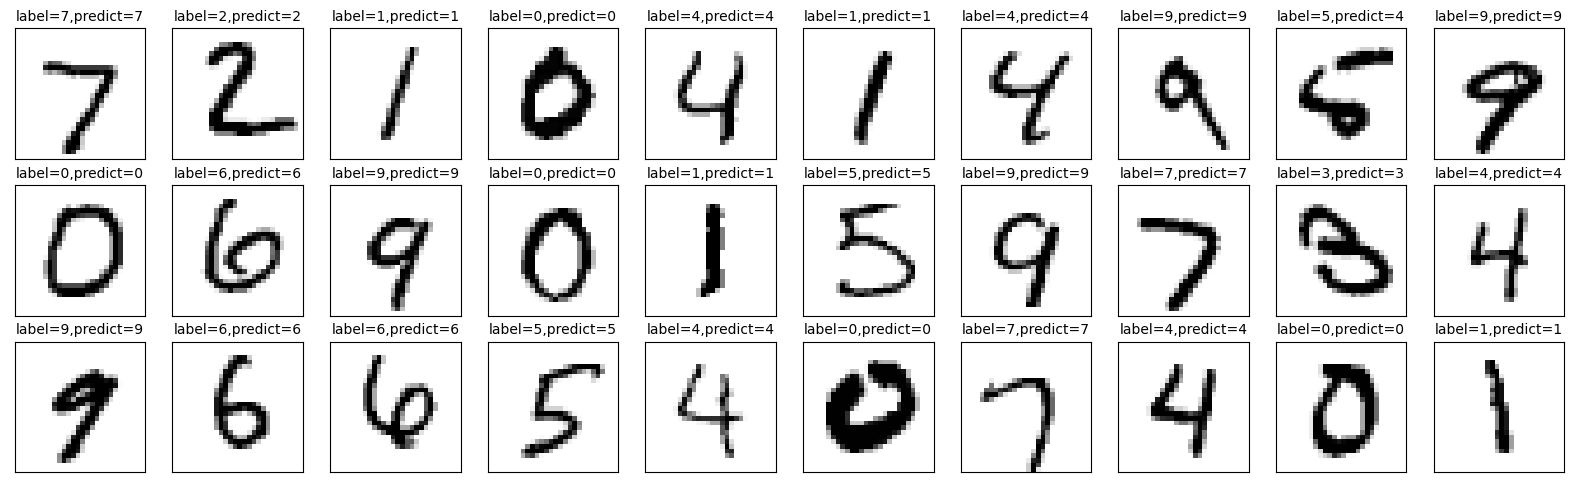

In [8]:
def plot_images_labels_prediction(images,labels,prediction,index,num=10):
    fig=plt.gcf()
    fig.set_size_inches(20,20)
    if num>100:num=100
    for i in range(0,num):
        ax=plt.subplot(10,10,i+1)
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary')
        title='label='+str(np.argmax(labels[index]))
        if len(prediction)>0:
            title+=',predict='+str(prediction[index])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index+=1
    plt.show()

plot_images_labels_prediction(test_images,test_labels_ndarray,prediction_result,0,30)